In [11]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


class RBFNetwork:
    def __init__(self, n_centers, sigma=None):
        self.n_centers = n_centers
        self.centers = None
        self.sigma = sigma
        self.weights = None

    def _gaussian(self, x, c, s):
        return np.exp(-1 / (2 * s**2) * np.linalg.norm(x - c)**2)

    def _distance_matrix(self, X, centers):
        return np.array([[np.linalg.norm(x - c) for c in centers] for x in X])

    def _select_centers(self, X):
        idx = np.random.choice(X.shape[0], self.n_centers, replace=False)
        self.centers = X[idx]

    def _calculate_sigma(self, X):
        if self.sigma is None:
            D = self._distance_matrix(X, self.centers)
            self.sigma = np.mean(np.mean(D, axis=0))

    def fit(self, X, y):
        self._select_centers(X)
        self._calculate_sigma(X)
        
        G = np.zeros((X.shape[0], self.n_centers))
        for i in range(X.shape[0]):
            for j in range(self.n_centers):
                G[i, j] = self._gaussian(X[i], self.centers[j], self.sigma)
        
        self.weights = np.linalg.pinv(G).dot(y)

    def predict(self, X):
        G = np.zeros((X.shape[0], self.n_centers))
        for i in range(X.shape[0]):
            for j in range(self.n_centers):
                G[i, j] = self._gaussian(X[i], self.centers[j], self.sigma)
        
        return np.dot(G, self.weights)

n_centers = 10
rbf = RBFNetwork(n_centers=n_centers)
rbf.fit(X_train, y_train)

y_pred = rbf.predict(X_test)

from sklearn.metrics import accuracy_score
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.89


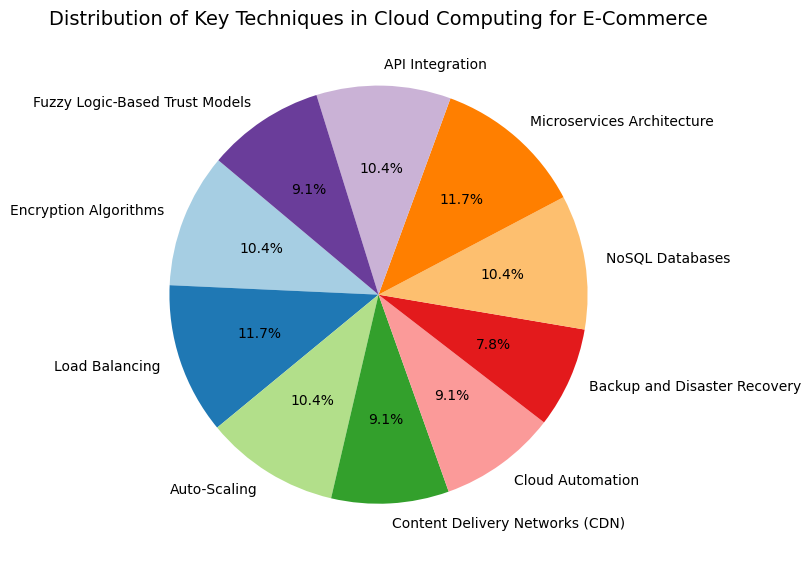

In [3]:
import matplotlib.pyplot as plt

techniques = [
    "Encryption Algorithms", "Load Balancing", "Auto-Scaling", 
    "Content Delivery Networks (CDN)", "Cloud Automation", 
    "Backup and Disaster Recovery", "NoSQL Databases", 
    "Microservices Architecture", "API Integration", 
    "Fuzzy Logic-Based Trust Models"
]

importance = [8, 9, 8, 7, 7, 6, 8, 9, 8, 7]

plt.figure(figsize=(8, 8))
plt.pie(importance, labels=techniques, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title('Distribution of Key Techniques in Cloud Computing for E-Commerce', fontsize=14)

plt.tight_layout()
plt.show()
